In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

#--------------------Setup the main directories------------------#
#Define the various directories
script_dir = os.getcwd()                         #define current dir
main_dir = os.path.dirname(script_dir)           #go up of one directory
results_dir = os.path.join(main_dir, "figure")   #define results dir

if not os.path.exists(results_dir):              #if the directory does not exist create it
    os.mkdir(results_dir)


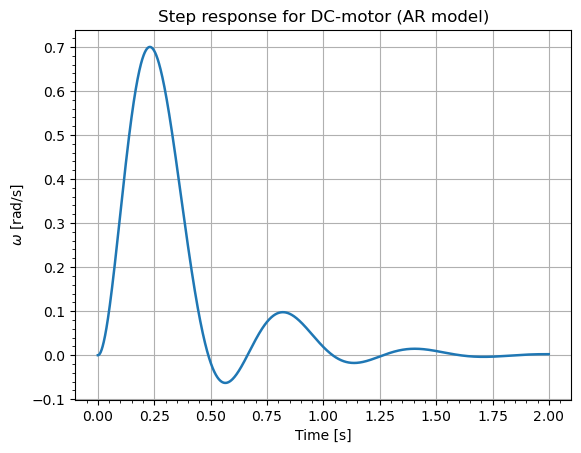

In [33]:
J = 0.01    #rotor's inertia [kg m^2]
b = 0.001   #viscous friction coefficient [N m s]
Kt = 1      #torque constant
Ke = 1      #electric constant
R = 10      #resistance [Ohm]
L = 1       #inductance [H]
K = 0.5     #spring constant [N/m]

#define time parameters
Nt_step = 2000
dt = 1e-3
tmax = dt * Nt_step
tt = np.arange(0, tmax, dt)


#AR parameter
alpha11 = 1 - b * dt /J
alpha12 = Kt * dt /J
alpha13 = - K * dt /J
alpha21 = - Ke * dt /L
alpha22 = 1 - R * dt /L
alpha23 = 0
alpha31 = dt
alpha32 = 0
alpha33 = 1
beta = 1 * dt /L

A = np.array([[alpha11, alpha12, alpha13], [alpha21, alpha22, alpha23], [alpha31, alpha32, alpha33]])     #matrix A of the system
B = np.array((0, beta, 0))
C = [[1, 0, 0]]
D = 0

#define initial array
u = np.ones(Nt_step)      #step function

#define initial array of y = [w, i]
y = np.zeros((Nt_step,3))     #initial condition are setted to zero

for k in range(0, Nt_step-1):
    y[k+1] = A@y[k] + B*u[k]
    
#--------------------------Plot results----------------------#
plt.title('Step response for DC-motor (AR model)')
plt.xlabel('Time [s]')
plt.ylabel('$\omega$ [rad/s]')
plt.grid(True)
plt.minorticks_on()
plt.plot(tt,y[:,0], linestyle='-', linewidth=1.8, marker='')

# save the plot in the results dir
#out_name = os.path.join(results_dir, "StepRespAR_DCmotor.png")
#plt.savefig(out_name)
plt.show()

In [28]:
import scipy
from scipy import signal

A = [[alpha11, alpha12, alpha13], [alpha21, alpha22, alpha23], [alpha31, alpha32, alpha33]]     #matrix A of the system
B = [[0], [beta], [0]]
C = [[1, 0, 0]]
D = 0

num_coeff, den_coeff = scipy.signal.ss2tf(A, B, C, D)

poles = np.roots(den_coeff)
print("Poles are : ", poles)
#zeros = np.roots(num_coeff)
#print("Zeros are: " , zeros)

print(den_coeff)

Poles are :  [0.9969229 +0.01082812j 0.9969229 -0.01082812j 0.99605419+0.j        ]
[ 1.        -2.9899     2.979951  -0.9900505]


In [29]:
#compute zeros and poles and gain using scipy
a1 = scipy.signal.tf2zpk(num_coeff, den_coeff)
zeros1 = a1[0]
poles1 = a1[1]
gain1 = a1[2]

print(f"Zeros: {zeros1}")
print(f"Poles: {poles1}")
print(f"gain: {gain1}")



Zeros: [1.]
Poles: [0.9969229 +0.01082812j 0.9969229 -0.01082812j 0.99605419+0.j        ]
gain: 9.999999999976694e-05
